**Simple Linear Regression**

Salary_hike --> Build a prediction model for Salary_hike


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#STEP 1: Importing data

In [2]:
df= pd.read_csv("/content/Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#STEP 2:EDA

In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.duplicated().sum()

0

#STEP 3: **VISUALIZATIONS**

Plotting the data to check for outliers

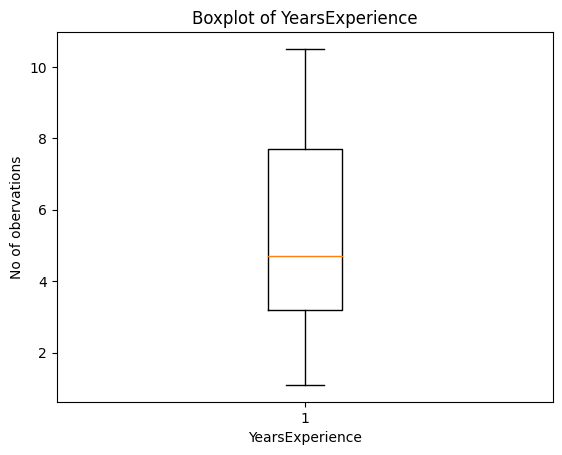

In [11]:
plt.boxplot(df.YearsExperience)
plt.xlabel("YearsExperience")
plt.ylabel("No of obervations")
plt.title("Boxplot of YearsExperience")
plt.show()

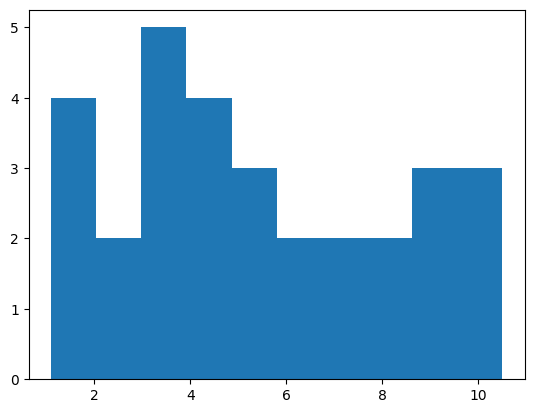

In [12]:
plt.hist(df.YearsExperience)
plt.show()

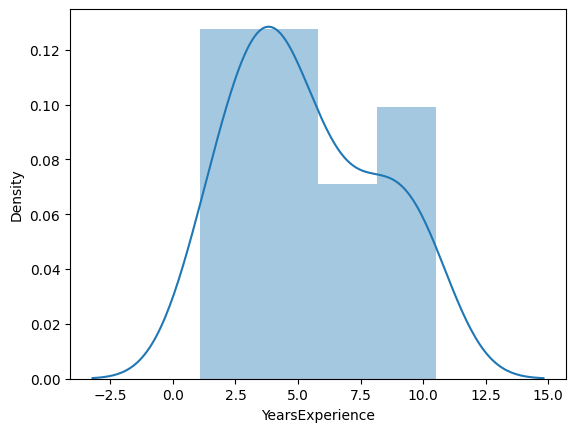

In [13]:
sns.distplot(df['YearsExperience'])
plt.show()


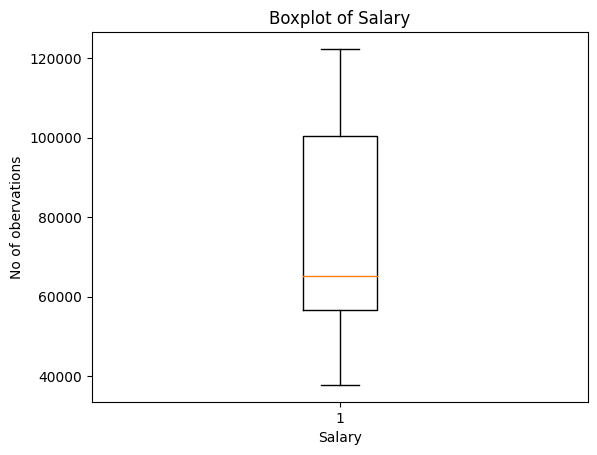

In [14]:
plt.boxplot(df.Salary)
plt.xlabel("Salary")
plt.ylabel("No of obervations")
plt.title("Boxplot of Salary")
plt.show()

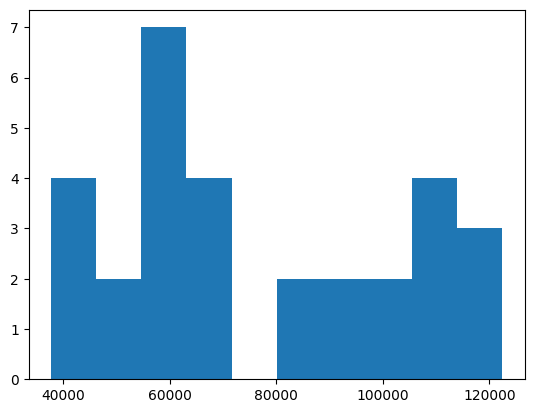

In [15]:
plt.hist(df.Salary)
plt.show()

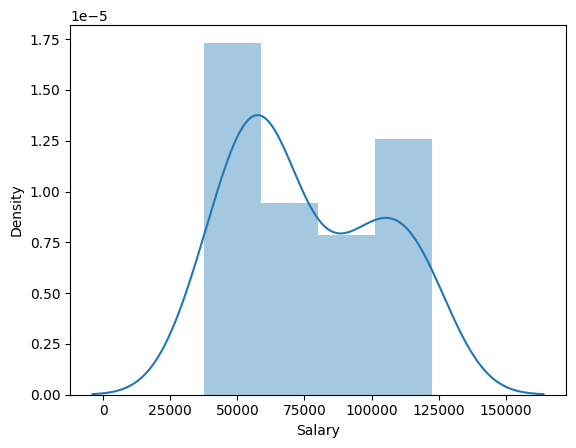

In [16]:
sns.distplot(df['Salary'])
plt.show()

[]

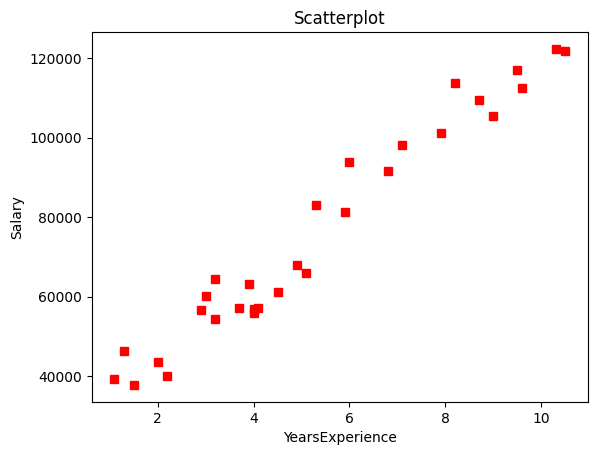

In [17]:
plt.plot(df.YearsExperience,df.Salary,"rs")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Scatterplot")
plt.plot()

As you can see there are no Outliers in the data

#Step 4
**CORRELATION ANALYSIS**

In [18]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization of Correlation beteen x and y**

regplot = regression plot

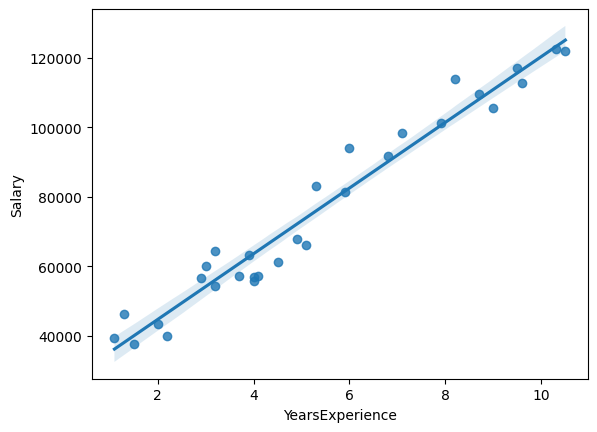

In [19]:
sns.regplot(x="YearsExperience", y="Salary", data=df);

As you can see above

There is good correlation between the two variable.

The score is more than 0.9 which is a good sign

# Step 5

Checking for Homoscedasticity or Hetroscedasticity

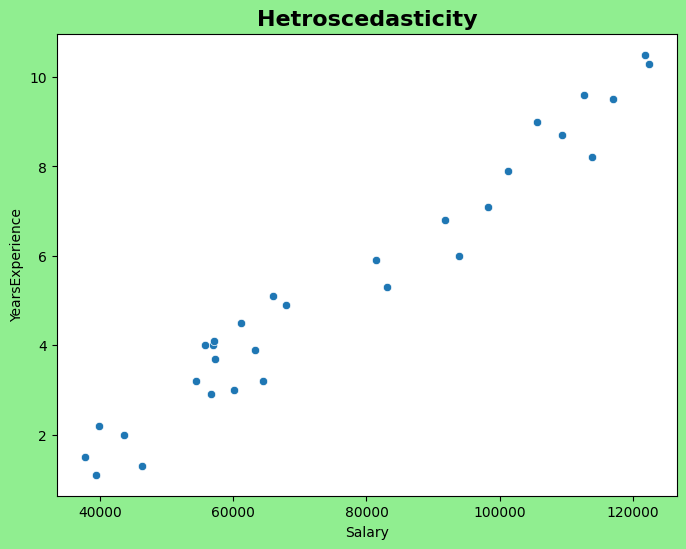

In [20]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Salary'], y = df['YearsExperience'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [21]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As you can see in above graph

It shows as the Years Experience increases salary also increases with much variation along the way

The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

#Step 6

**Feature Engineering**

Trying different transformation of data to estimate normal distribution and to remove any skewness

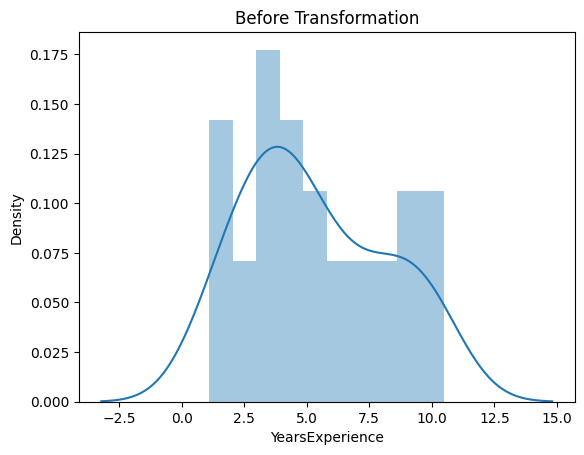

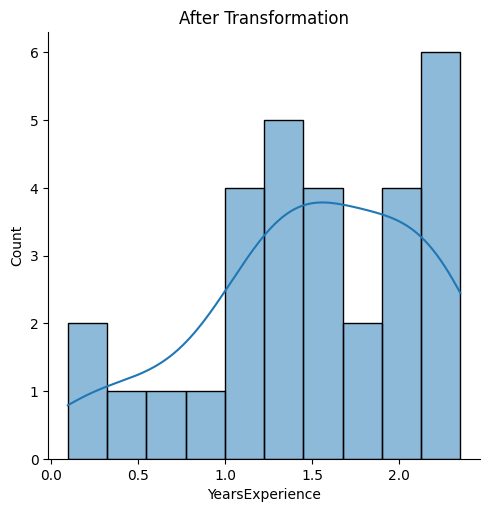

In [22]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

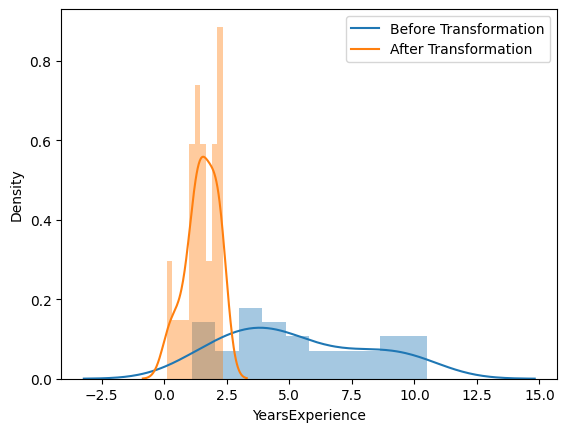

In [23]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As you can see

How log transformation affects the data and it scales the values down.

Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

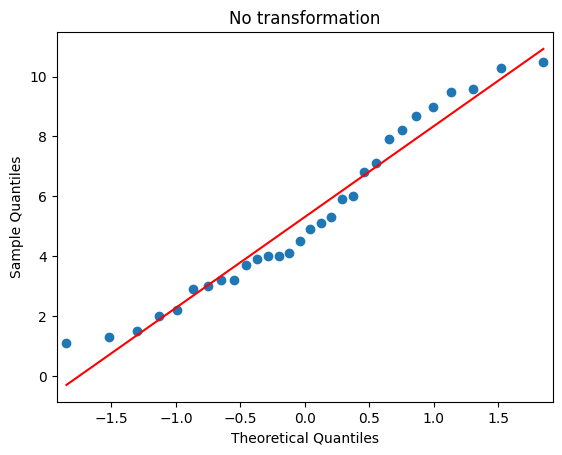

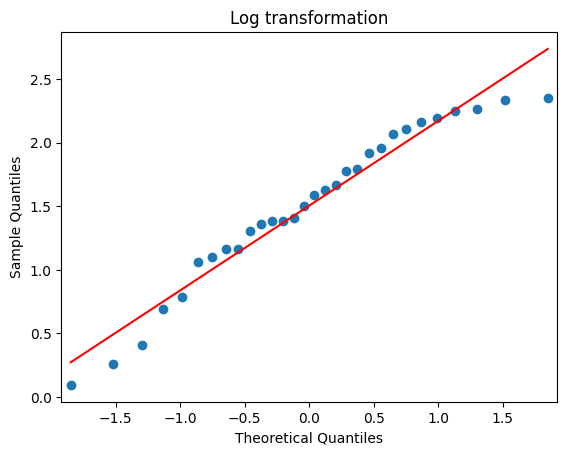

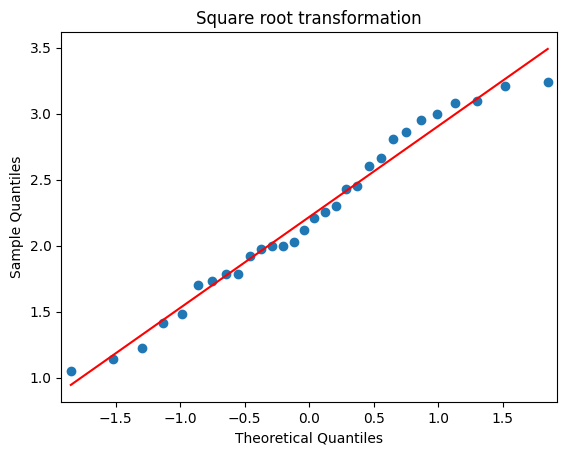

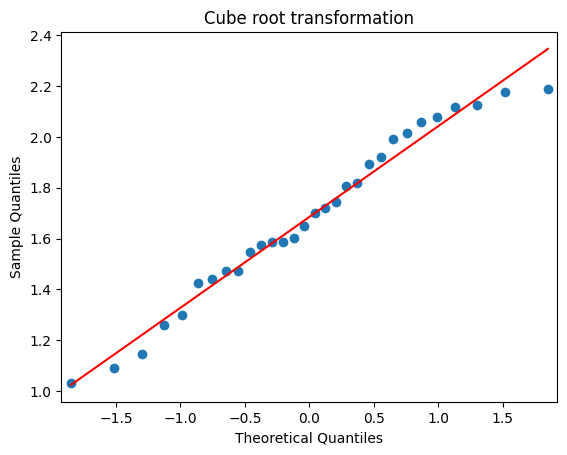

In [24]:
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

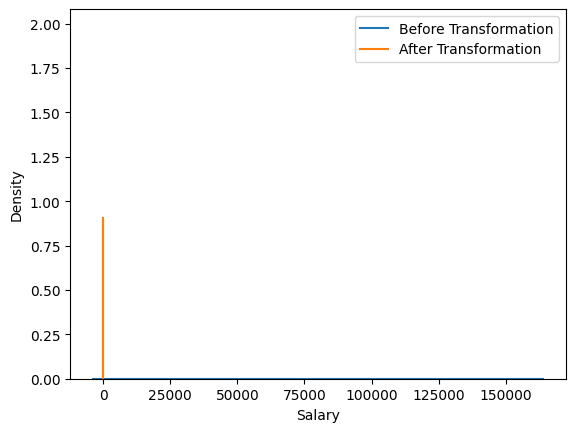

In [25]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.distplot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

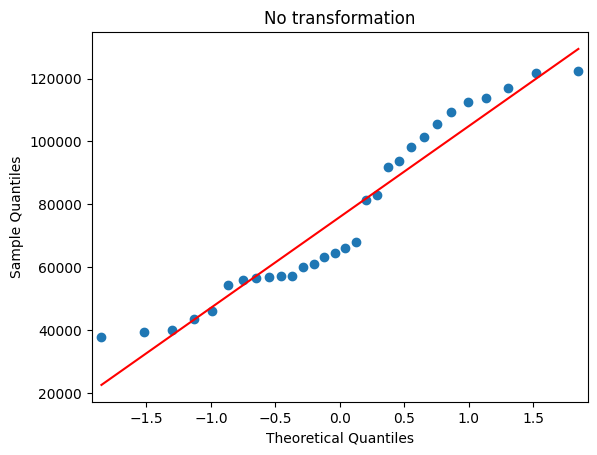

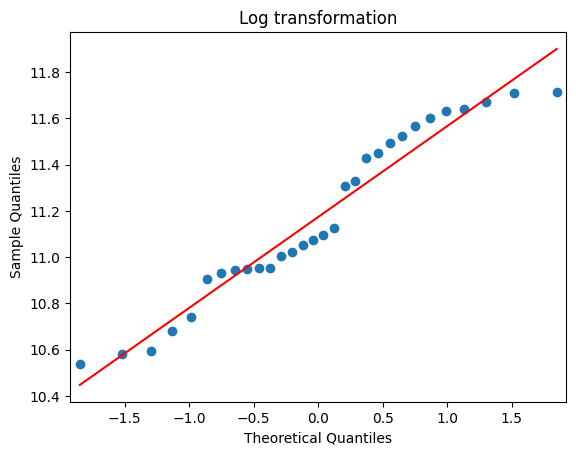

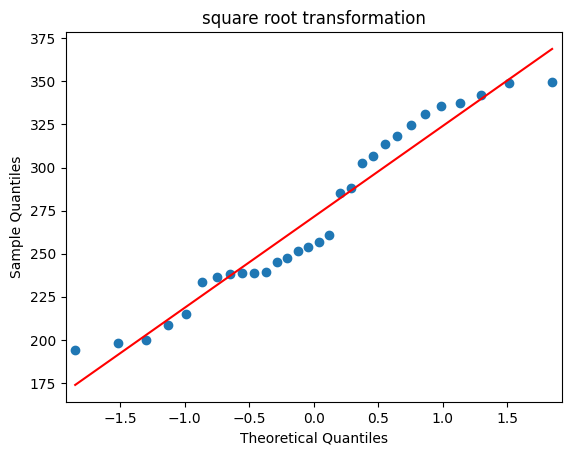

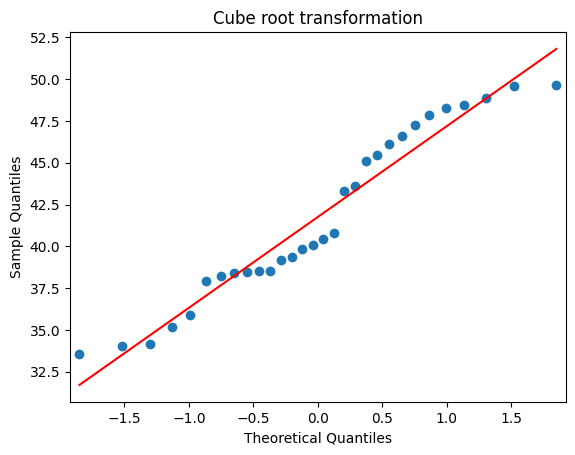

In [26]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Important Note:
We only Perform any data transformation when the data is skewed or not normal

Step 7 MODEL BUILDING AND TESTING

Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression


In [27]:
import statsmodels.formula.api as smf
model = smf.ols("YearsExperience~Salary",data=df).fit()
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

from above it is inferred that

intercept = βo = -2.383161  
 β1 = 0.0001  
therefore equation  
y(Sorting_time)= β1(x)+βo
y=0.0001x-2.38

In [28]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        09:30:04   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#R2 value is 0.957 means accuracy is 95.7%

In [30]:
pred = model.predict(df)
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [31]:
model.resid

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64

In [32]:
rmse_lin = np.sqrt(np.mean(np.array(df['YearsExperience'])-np.array(pred))**2)
rmse_lin

2.7385501274087196e-15

Cube Root transformation on Data

In [33]:
model2 = smf.ols("np.cbrt(YearsExperience)~np.cbrt(Salary)",data=df).fit()
model2.params

Intercept         -0.929033
np.cbrt(Salary)    0.062596
dtype: float64

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.cbrt(YearsExperience)   R-squared:                       0.932
Model:                                  OLS   Adj. R-squared:                  0.930
Method:                       Least Squares   F-statistic:                     386.5
Date:                      Fri, 29 Sep 2023   Prob (F-statistic):           6.37e-18
Time:                              09:31:06   Log-Likelihood:                 31.493
No. Observations:                        30   AIC:                            -58.99
Df Residuals:                            28   BIC:                            -56.18
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9290      0.134     -6.937      0.000      -1.203      -0.655
np.cbrt(Salary)     0.0626      0.003     19.659      0.000       0.056       0.069
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.612
Skew:                          -0.564   Prob(JB):                        0.447
Kurtosis:                       3.124   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#R2 value is 0.932 means the accuracy is 93.2%

In [36]:
pred2 = model2.predict(df)

In [37]:
pred2

0     1.199929
1     1.317133
2     1.170446
3     1.272837
4     1.209768
5     1.474914
6     1.523552
7     1.443423
8     1.580590
9     1.482628
10    1.564561
11    1.462857
12    1.479362
13    1.481109
14    1.536544
15    1.625136
16    1.600985
17    1.802406
18    1.783371
19    1.916491
20    1.894082
21    1.959585
22    1.988964
23    2.104449
24    2.065016
25    2.029493
26    2.132242
27    2.093956
28    2.178831
29    2.174431
dtype: float64

In [38]:
model2.resid

0    -0.167649
1    -0.225740
2    -0.025732
3    -0.012916
4     0.090823
5    -0.048871
6    -0.081302
7     0.030190
8    -0.106978
9     0.064052
10    0.009500
11    0.124544
12    0.108039
13    0.119412
14    0.114420
15    0.073363
16    0.120315
17   -0.058893
18    0.023598
19   -0.099371
20    0.000455
21   -0.037588
22    0.002668
23   -0.087920
24   -0.008306
25    0.050591
26   -0.014330
27    0.031361
28   -0.003063
29    0.015328
dtype: float64

In [39]:
model2.resid_pearson

array([-1.91234237, -2.5749729 , -0.29351773, -0.14733106,  1.03600572,
       -0.557466  , -0.92739707,  0.34437148, -1.22027444,  0.73063364,
        0.10836757,  1.42064822,  1.2323771 ,  1.36210832,  1.30516494,
        0.83683774,  1.37241491, -0.67178024,  0.26917332, -1.13350401,
        0.00518697, -0.42876097,  0.03043448, -1.00288364, -0.09474345,
        0.5770796 , -0.1634642 ,  0.3577312 , -0.03494376,  0.17484663])

In [40]:
rmse_lin = np.sqrt(np.mean(np.array(df['YearsExperience'])-np.array(pred2))**2)
rmse_lin

3.6283635726499246


Log transformation on Data

In [41]:
model3 = smf.ols("np.log(YearsExperience)~np.log(Salary)",data=df).fit()
model3.params

Intercept        -16.490132
np.log(Salary)     1.610448
dtype: float64

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.905
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     267.4
Date:                     Fri, 29 Sep 2023   Prob (F-statistic):           7.40e-16
Time:                             09:32:04   Log-Likelihood:                 7.4195
No. Observations:                       30   AIC:                            -10.84
Df Residuals:                           28   BIC:                            -8.037
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#R square value is 0.905 so accuracy is 90.5%

In [44]:
pred3 = model3.predict(df)
pred3

0     0.548531
1     0.807443
2     0.481156
3     0.711214
4     0.570808
5     1.135431
6     1.232204
7     1.071722
8     1.343278
9     1.150909
10    1.312320
11    1.111138
12    1.144362
13    1.147864
14    1.257730
15    1.428283
16    1.382382
17    1.752473
18    1.718687
19    1.950166
20    1.911966
21    2.022786
22    2.071674
23    2.259197
24    2.195981
25    2.138317
26    2.303261
27    2.242456
28    2.376233
29    2.369390
dtype: float64

In [45]:
model3.resid

0    -0.453221
1    -0.545078
2    -0.075691
3    -0.018067
4     0.217650
5    -0.070720
6    -0.133592
7     0.091429
8    -0.180127
9     0.157424
10    0.048657
11    0.275156
12    0.241932
13    0.263122
14    0.246347
15    0.160953
16    0.246858
17   -0.084767
18    0.056266
19   -0.158406
20    0.004956
21   -0.062691
22   -0.004811
23   -0.155063
24   -0.032658
25    0.058908
26   -0.051969
27    0.019307
28   -0.044089
29   -0.018014
dtype: float64

In [46]:
rmse_lin=np.sqrt(np.mean(np.array(df['YearsExperience']-np.array(pred3))**2))
rmse_lin

4.414061690894889

Square Root transformation on data

In [47]:
model4 = smf.ols("np.sqrt(YearsExperience)~np.sqrt(Salary)",data=df).fit()
model4.params

Intercept         -1.161190
np.sqrt(Salary)    0.012455
dtype: float64

In [48]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(YearsExperience)   R-squared:                       0.942
Model:                                  OLS   Adj. R-squared:                  0.940
Method:                       Least Squares   F-statistic:                     454.3
Date:                      Fri, 29 Sep 2023   Prob (F-statistic):           7.58e-19
Time:                              09:32:47   Log-Likelihood:                 14.149
No. Observations:                        30   AIC:                            -24.30
Df Residuals:                            28   BIC:                            -21.49
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(Salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#R2 is 0.942 so the accuracy is 94.2%

In [50]:
pred4 = model4.predict(df)
pred4

0     1.309309
1     1.516100
2     1.258168
3     1.437296
4     1.326455
5     1.803097
6     1.893511
7     1.745040
8     2.000691
9     1.817376
10    1.970446
11    1.780824
12    1.811328
13    1.814562
14    1.917817
15    2.085250
16    2.039314
17    2.429022
18    2.391558
19    2.656285
20    2.611278
21    2.743334
22    2.803050
23    3.040703
24    2.959037
25    2.885928
26    3.098582
27    3.018919
28    3.196192
29    3.186944
dtype: float64

In [51]:
model4.resid

0    -0.260500
1    -0.375925
2    -0.033423
3    -0.023082
4     0.156785
5    -0.100158
6    -0.161461
7     0.043815
8    -0.211837
9     0.106163
10    0.004395
11    0.219176
12    0.188672
13    0.210284
14    0.203504
15    0.128345
16    0.219004
17   -0.126849
18    0.037433
19   -0.206795
20   -0.003597
21   -0.078751
22    0.007644
23   -0.177139
24   -0.009461
25    0.114072
26   -0.016375
27    0.079467
28    0.013169
29    0.053426
dtype: float64

In [52]:
rmse_lin=np.sqrt(np.mean(np.array(df['YearsExperience']-np.array(pred4))**2))
rmse_lin

3.7982668710631695

PREDICTION

In [54]:
# for better prediction model3(by log transformation) is suitable because of high rsquared value  & low rmse value compare to other models
predicted = pd.DataFrame()
predicted['Salary'] = df.Salary
predicted['YearsExperience'] = df.YearsExperience
predicted['Predicted_YearsExperience'] = pd.DataFrame(np.exp(model2.predict(predicted.Salary)))
predicted

,Salary,YearsExperience,Predicted_YearsExperience
0,39343.0,1.1,3.319881
1,46205.0,1.3,3.732703
2,37731.0,1.5,3.223430
3,43525.0,2.0,3.570969
4,39891.0,2.2,3.352707
5,56642.0,2.9,4.370662
6,60150.0,3.0,4.588492
7,54445.0,3.2,4.235167
8,64445.0,3.2,4.857822
9,57189.0,3.7,4.404506


Predicitng from Original Model without any data transformation

In [56]:
predicted1 = pd.DataFrame()
predicted1['Salary'] = df.Salary
predicted1['YearsExperience'] = df.YearsExperience
predicted1['Predicted_YearsExperience'] = pd.DataFrame(model.predict(predicted1.Salary))
predicted1

,Salary,YearsExperience,Predicted_YearsExperience
0,39343.0,1.1,1.600934
1,46205.0,1.3,2.295819
2,37731.0,1.5,1.437694
3,43525.0,2.0,2.024427
4,39891.0,2.2,1.656428
5,56642.0,2.9,3.352729
6,60150.0,3.0,3.707969
7,54445.0,3.2,3.130248
8,64445.0,3.2,4.142905
9,57189.0,3.7,3.408121
